# Read the DataSet:

In [2]:
import pandas as pd
import numpy as np


data_set = pd.read_csv('/kaggle/input/churn-dataset/p01_bank_data/bank_data_train.csv')
data_set.describe()

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.000000,355190.000000,316867.000000,155163.0,60550.000000,155163.0,155163.0,355190.000000,77112.000000,77112.000000,...,355190.000000,95713.000000,93448.000000,98175.000000,95713.000000,355190.000000,93448.000000,93448.000000,93448.000000,355190.000000
mean,368794.674875,0.105225,0.044045,0.0,50.947498,0.0,0.0,0.001305,0.416896,0.414572,...,0.007309,0.055074,0.025707,0.049943,0.009252,0.004309,0.013938,0.013938,0.013938,0.081435
std,128148.804566,0.431372,0.108449,0.0,21.777855,0.0,0.0,0.029118,0.316493,0.338612,...,0.066681,0.215909,0.115732,0.185830,0.092789,0.059852,0.097099,0.097099,0.097099,0.273503
min,146841.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.006944,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257846.250000,0.000000,0.000000,0.0,33.000000,0.0,0.0,0.000000,0.166667,0.139645,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,368778.500000,0.000000,0.000000,0.0,54.000000,0.0,0.0,0.000000,0.300000,0.285714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,479737.750000,0.000000,0.036608,0.0,72.000000,0.0,0.0,0.000000,0.571429,0.661195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,590828.000000,11.000000,1.000000,0.0,89.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355190 entries, 0 to 355189
Columns: 116 entries, ID to TARGET
dtypes: float64(94), int64(9), object(13)
memory usage: 314.3+ MB


# Getting Numerical and Categorical colummns:

In [4]:
NumericalColumns = data_set.select_dtypes(include=['number']).columns
CategoricalColumns = data_set.select_dtypes(exclude=['number']).columns

In [5]:
ImpracticalCategoricalColumns = ['APP_MARITAL_STATUS', 'APP_DRIVING_LICENSE', 'CLNT_JOB_POSITION', 'PACK']
CategoricalColumns = [col for col in CategoricalColumns if col not in ImpracticalCategoricalColumns]

In [6]:
print(CategoricalColumns)

['CLNT_TRUST_RELATION', 'APP_KIND_OF_PROP_HABITATION', 'CLNT_JOB_POSITION_TYPE', 'APP_EDUCATION', 'APP_TRAVEL_PASS', 'APP_CAR', 'APP_POSITION_TYPE', 'APP_EMP_TYPE', 'APP_COMP_TYPE']


# Preprocess the bool features:

In [7]:
BoolColumns = ['APP_CAR', 'APP_TRAVEL_PASS']
mapping = {'Y': 1, 'N': -1}
data_set[BoolColumns] = data_set[BoolColumns].map(lambda x: mapping.get(x, 0))

In [8]:
NumericalColumns = NumericalColumns.union(pd.Index(BoolColumns))

# Impute numerical columns with median:

In [9]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
data_set[NumericalColumns] = num_imputer.fit_transform(data_set[NumericalColumns])

# Impute categorical columns with the most frequent value:

In [10]:
cat_imputer = SimpleImputer(strategy='most_frequent')
data_set[CategoricalColumns] = cat_imputer.fit_transform(data_set[CategoricalColumns])

# One-hot encode categorical features

In [11]:
from sklearn.preprocessing import OneHotEncoder

def One_hotEncode(Data_Set, NumericalCols, CategoricalCols):
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    encoded_column = pd.DataFrame(
        encoder.fit_transform(Data_Set[CategoricalCols]),
        columns=encoder.get_feature_names_out(CategoricalCols),
        index=Data_Set.index
    )
    return pd.concat([Data_Set[NumericalCols], encoded_column], axis=1)

DataFrame = One_hotEncode(data_set, NumericalColumns, CategoricalColumns)

# Drop the IDs:

In [12]:
DataFrame.drop(columns=['ID'], inplace=True, errors='ignore')

# Removing features with zero mean or very low variance

In [13]:
DataFrame = DataFrame.loc[:, DataFrame.mean() != 0]
ConvergedColumns = DataFrame.var()[DataFrame.var() < 1e-5].index
DataFrame.drop(columns=ConvergedColumns, inplace=True)

# Plot the Churned Data percentage:

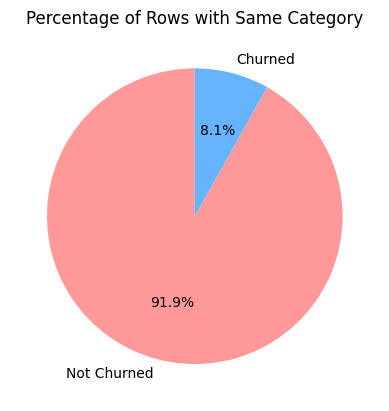

In [14]:
import matplotlib.pyplot as plt

churned_counts = DataFrame['TARGET'].value_counts() * 100
churned_counts = churned_counts.rename({0: 'Not Churned', 1: 'Churned'})

churned_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title("Percentage of Rows with Same Category")
plt.ylabel('')
plt.show()

# Normalize Data:

In [15]:
from sklearn.preprocessing import MinMaxScaler

def Normalize(df):
    scaler_Normalize = MinMaxScaler()
    scaler_Normalize.fit(df.drop(columns = 'TARGET'))
    _df = pd.DataFrame(scaler_Normalize.transform(df.drop(columns = 'TARGET')), columns=df.drop(columns = 'TARGET').columns)
    _df["TARGET"] = df["TARGET"]

    return DataFrame

DataFrame = Normalize(DataFrame)

# Balance The DataFrame:

In [16]:
from imblearn.combine import SMOTETomek

def getDataSplit(df):
    X = df.drop(columns='TARGET')
    y = df['TARGET']

    smote_tomek = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

    return X_resampled, y_resampled


# Commun Imports:

In [17]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

x_values, y_values = getDataSplit(DataFrame)
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42) # Split to 20% test

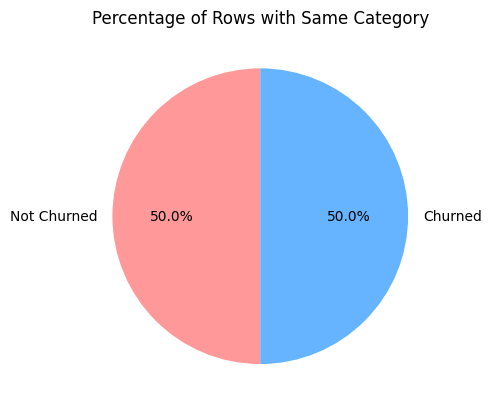

In [18]:
churned_counts = y_values.value_counts() * 100
churned_counts = churned_counts.rename({0: 'Not Churned', 1: 'Churned'})

churned_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title("Percentage of Rows with Same Category")
plt.ylabel('')
plt.show()

# Stochastic Classifier(Basic Classifier):

In [19]:
from sklearn.linear_model import SGDClassifier

param_grid = {
    'loss': ['log_loss', 'perceptron'],
    'penalty': ['l2', 'l1', None],
    'max_iter': [1000, 2000],
    'tol': [1e-3],
    'random_state': [42],
}

sgd = SGDClassifier()
sgd_grid_search = GridSearchCV(estimator=sgd, param_grid=param_grid, cv=5, n_jobs=-1)
sgd_grid_search.fit(X_train, y_train)

best_sgd_model = sgd_grid_search.best_estimator_

y_pred = best_sgd_model.predict(X_test)

# Accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Stochatic Gradient Descent Accuracy: {rf_accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Hyperparameters from Grid Search:")
print(sgd_grid_search.best_params_)

Stochatic Gradient Descent Accuracy: 0.6131
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.70      0.64     61665
         1.0       0.64      0.53      0.58     62124

    accuracy                           0.61    123789
   macro avg       0.62      0.61      0.61    123789
weighted avg       0.62      0.61      0.61    123789

Best Hyperparameters from Grid Search:
{'loss': 'log_loss', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'tol': 0.001}


# Random forest Classifier:

In [20]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3,5,8],
}

rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

best_rf_model = rf_grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Hyperparameters from Grid Search:")
print(rf_grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest Accuracy: 0.8590
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     61665
         1.0       0.87      0.84      0.86     62124

    accuracy                           0.86    123789
   macro avg       0.86      0.86      0.86    123789
weighted avg       0.86      0.86      0.86    123789

Best Hyperparameters from Grid Search:
{'max_depth': 8, 'n_estimators': 150}


In [21]:
feature_names = X_train.columns
feature_importances = best_rf_model.feature_importances_
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance (optional)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
threshold = 0.001
features_to_delete = [feature for feature, importance in sorted_features if importance < threshold]
X_train = X_train.drop(columns=features_to_delete)
X_test = X_test.drop(columns=features_to_delete)

# MLPClassifier:

In [22]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [20, 25],
    'activation': ['relu'],
    'learning_rate': ['constant'],
    'max_iter': [1500, 2000]
}

mlp = MLPClassifier()
mlp_grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
mlp_grid_search.fit(X_train, y_train)

best_mlp_model = mlp_grid_search.best_estimator_

y_pred = best_mlp_model.predict(X_test)

# Accuracy of the model
mlp_accuracy = accuracy_score(y_test, y_pred)
print(f"MultiLayer Perceptron Accuracy: {mlp_accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Best Hyperparameters from Grid Search:")
print(mlp_grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
MultiLayer Perceptron Accuracy: 0.6854
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.75      0.70     61665
         1.0       0.72      0.62      0.66     62124

    accuracy                           0.69    123789
   macro avg       0.69      0.69      0.68    123789
weighted avg       0.69      0.69      0.68    123789

Best Hyperparameters from Grid Search:
{'activation': 'relu', 'hidden_layer_sizes': 25, 'learning_rate': 'constant', 'max_iter': 1500}


# Keras Classifier:

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

keras_model = Sequential()
keras_model.add(Input(shape=(X_train.shape[1],)))
keras_model.add(Dense(128, activation='relu'))
keras_model.add(Dropout(0.3))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(BatchNormalization())
keras_model.add(Dropout(0.3))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dropout(0.3))
keras_model.add(Dense(1, activation='sigmoid'))

keras_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-4),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

history = keras_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=callbacks, verbose=1)

# Accuracy of the model
loss, accuracy = keras_model.evaluate(X_test, y_test)
print(f"Keras Accuracy: {accuracy:.4f}")

y_pred = keras_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


Epoch 1/100


I0000 00:00:1737668528.497976     168 service.cc:145] XLA service 0x7fd2040118b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737668528.498025     168 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  100/15474 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.5818 - loss: 0.7183  

I0000 00:00:1737668533.027522     168 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15474/15474 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.6464 - loss: 0.6352 - val_accuracy: 0.4987 - val_loss: 0.6685 - learning_rate: 0.0010
Epoch 2/100
15474/15474 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.6595 - loss: 0.6223 - val_accuracy: 0.4986 - val_loss: 0.6595 - learning_rate: 0.0010
Epoch 3/100
15474/15474 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.6609 - loss: 0.6196 - val_accuracy: 0.5094 - val_loss: 0.6703 - learning_rate: 0.0010
Epoch 4/100
15474/15474 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.6623 - loss: 0.6179 - val_accuracy: 0.5688 - val_loss: 0.6529 - learning_rate: 0.0010
Epoch 5/100
15474/15474 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.6621 - loss: 0.6159 - val_accuracy: 0.5909 - val_loss: 0.6477 - learning_rate: 0.0010
Epoch 6/100
15474/15474 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.6622 - loss: 0.6149 - val_accuracy: 0.6551 - val_loss: 0.6287 - learning_rate: 0.0010
Epoch 7/100
15474/15474 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accu

# Plot the learning curve for Keras

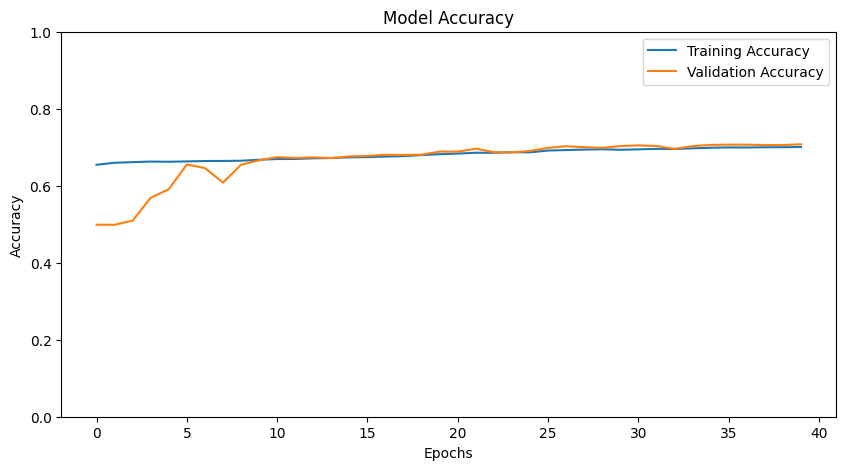

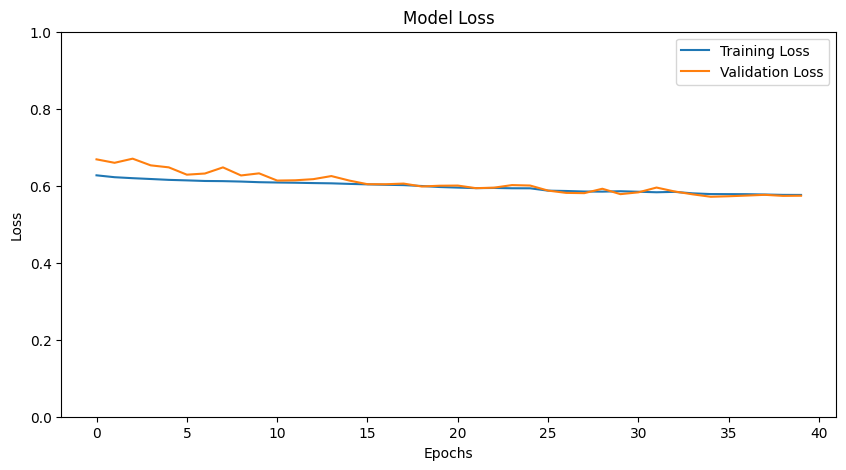

In [24]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

# TensorFlow Classifier:

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

tf_model = Sequential()
tf_model.add(Input(shape=(X_train.shape[1],)))
tf_model.add(Dense(128, activation='relu'))
tf_model.add(Dense(64, activation='relu'))
tf_model.add(Dense(1, activation='sigmoid'))

tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = tf_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=1)

# Accuracy of the model
loss, accuracy = tf_model.evaluate(X_test, y_test)
print(f"Tenserflow Accuracy: {accuracy:.4f}")

y_pred = tf_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

Epoch 1/50
24758/24758 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.6068 - loss: 119.9020 - val_accuracy: 0.6238 - val_loss: 0.6549
Epoch 2/50
24758/24758 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.6191 - loss: 0.6546 - val_accuracy: 0.6579 - val_loss: 0.6200
Epoch 3/50
24758/24758 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.6588 - loss: 0.6217 - val_accuracy: 0.6676 - val_loss: 0.6209
Epoch 4/50
24758/24758 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.6657 - loss: 0.6211 - val_accuracy: 0.6680 - val_loss: 0.6104
Epoch 5/50
24758/24758 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.6703 - loss: 0.6119 - val_accuracy: 0.6703 - val_loss: 0.6072
Epoch 6/50
24758/24758 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.6750 - loss: 0.6106 - val_accuracy: 0.6774 - val_loss: 0.6050
Epoch 7/50
24758/24758 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.6594 - loss: 0.6335 - val_accuracy: 0.6494 - val_loss: 0.6212
Epoch 8/50
24758/24758 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy

# Plot The learning Curve for TensorFlow:

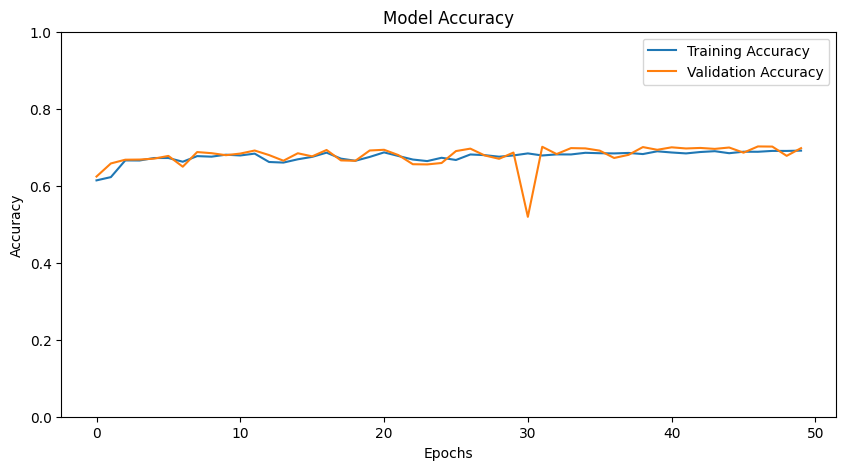

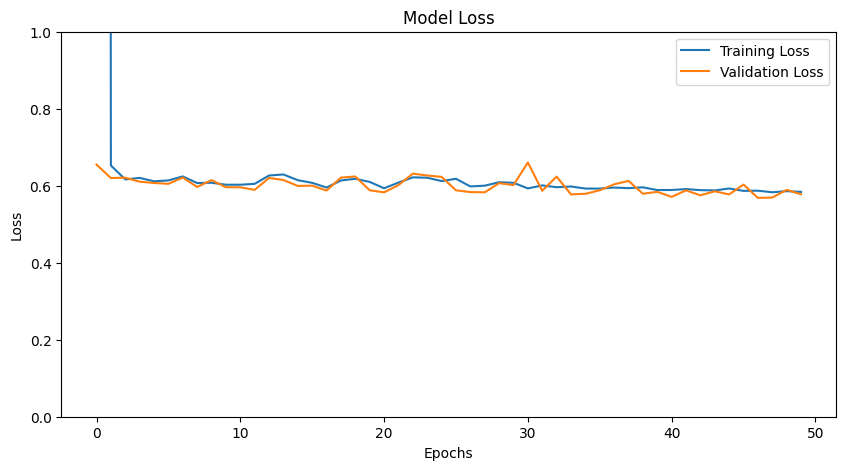

In [38]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Test Predections on The Test DataSet:

In [39]:
data_set = pd.read_csv('/kaggle/input/churn-dataset/p01_bank_data/bank_data_test.csv')
columns_to_keep = DataFrame.columns.tolist()
columns_to_keep.append('ID')
Test_DataFrame = data_set.loc[:, data_set.columns.isin(columns_to_keep)]
BoolColumns = ['APP_CAR', 'APP_TRAVEL_PASS']
mapping = {'Y': 1, 'N': -1}
Test_DataFrame.loc[:, BoolColumns] = Test_DataFrame[BoolColumns].map(lambda x: mapping.get(x, 0))
Test_x_values = Normalize(Test_DataFrame.drop(columns=['ID']))
numcols = [col for col in NumericalColumns if col in Test_x_values.columns]
catcols = [col for col in CategoricalColumns if col in Test_x_values.columns]
Test_x_values[numcols] = num_imputer.fit_transform(Test_x_values[numcols])
Test_x_values[catcols] = cat_imputer.fit_transform(Test_x_values[catcols])
Test_x_values = Test_x_values.drop(columns=['TARGET'])

y_pred = best_rf_model.predict(Test_x_values)

FinalPredections = pd.DataFrame(columns=['ID', 'TARGET'])
FinalPredections['ID'] = Test_DataFrame['ID']
FinalPredections['TARGET'] = (y_pred > 0.5).astype(int)

FinalPredections.to_csv("/kaggle/working/predictions.csv", index=False)